<a href="https://colab.research.google.com/github/kasdallahF/StudentsTeach/blob/master/dl_crashcourse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>Einführung in Deep Learning</center></h1>

#### 1. Das große Bild

In der letzten Sitzung haben wir uns das Grundprinzip des überwachten maschinellen Lernens angeschaut. Genauer gesagt haben wir folgende Animation als Grundlage des Verständnis betrachtet.
https://hackernoon.com/visualizing-linear-regression-with-pytorch-9261f49edb09

Ein machine Learning Algorithmus besteht aus 4 Bausteinen:
1. Ein Datensatz: besteht aus vielen Datenpunkten. Ein Datenpunkt besteht aus einer Reihe an unabhängigen Variablen (Features = Merkmale) und eine abhängige Variable (target = Vorhersageziel ). Unsere Annahme ist: es existiert eine Zielfunktion, die diesen Datensatz beschreibt, i.e. es gibt eine Funktion, die für jeden Datenpunkt dieses Datensatzes aus den Merkmalen das richtige Vorhersageziel ermitteln kann. 

2. Ein Skeleton: eine mathematische Funktion, die wir auswählen, um die Zielfunktion bestmöglichst zu approximieren. Da wir die Zielfunktion nicht kennen, müssen wir mit verschiedenen Skeleton experimentieren. 

3. Eine Verlustmetrik: unser Skeleton produziert einen geschätzten Wert für den betrachteten Datenpunkt. Die Verlustmetrik gibt an, wie sehr sich die Schätzung von dem richtigen Wert abweicht. 

4. Ein Optimierungsalgorithmus: das Herzstück des Lernverfahrens. Aufbauend auf den ermittelten Fehler modifiziert der Optimierungsalgorithmus die Parameter so, dass der Fehler bei der nächsten Abschätzung geringer wird.  


Deep Learning bezeichnet eine Reihe an Machine Learning Algorithmen, die ein bestimmmtes Skeleton einsetzen, nämlich ein künstliches neuronales Netz. 

#### 2. Was sind künstliche neuronale Netze?

Hierfür werden wir uns nochmal das Ganze, was wir bisher behandelt haben, graphisch anschauen. 

#### 3. Warum sind kNNs so effektiv? 

In den 90ern des letzten Jahrhunderts konnten Mathematiker beweisen, dass neuronale Netze, mit beliebiger Anzahl an Neuronen (beliebig tief oder beliebig breit) in der Lage sind, jede reelle Funktion zu approximieren. 
Dieses Ergebnis ist der Grund hinter der Verbreitung und der Beliebtheit von künstlichen neuronalen Netzen. 

#### 4. Praxisbeispiel 

* **Daten beschaffen** 

In [1]:
import tensorflow as tf
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist

* **Daten aufteilen**

In [33]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

* **Daten untersuchen**

In [34]:
print ('----------------------')
print (X_train.shape)
print ('----------------------')
print (y_train.shape)
print ('----------------------')
print (X_test.shape)
print ('----------------------')
print (y_test.shape)
print ('----------------------')

----------------------
(60000, 28, 28)
----------------------
(60000,)
----------------------
(10000, 28, 28)
----------------------
(10000,)
----------------------




Für den fashion_mnist Datensatz gibt es keine in der Bibliothek definierte Zuordnung der Kategorien zu den ausgegebenen Zahlen. Wenn das der Fall ist, lohnt es sich in der Dokumentation reizuschauen und eine neue Variable in unserem Skript mit den Kategorien zu erstellen.

In [35]:
kategorien = [" T-shirt/ top", "Trouser", "Pullover", "Dress", 
              "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

* **Daten visualisieren**

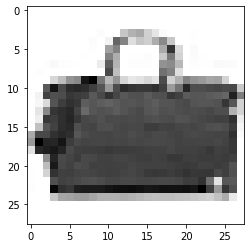

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt 

plt.imshow(X_train[99], cmap=
           'binary') # cmap = colormap = Farbpalette
plt.show()

-----------------------------------------------------------------------------------------------------
**Übung**

1. Zeigt das 100ste Bild im Datensatz an. 
2. Welche Farbe haben die originalen Bilder? Wie zeigt man sie an? 

-----------------------------------------------------------------------------------------------------

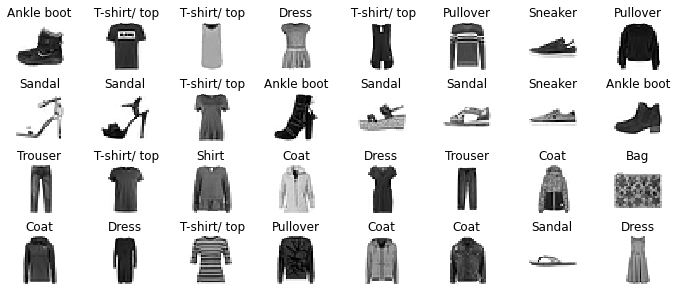

In [37]:
n_rows = 4
n_cols = 8
plt.figure(figsize=(n_cols * 1.5, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(kategorien[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

* **Daten aufbereiten**

In [38]:
X_train = X_train/ 255.0  
X_test = X_test/ 255.0 

* **Modell trainieren**

In [39]:
fashion_model = keras.models.Sequential()
fashion_model.add(keras.layers.Flatten(input_shape= [28, 28]))
fashion_model.add(keras.layers.Dense(300, activation="relu"))
fashion_model.add(keras.layers.Dense(100, activation="relu"))
fashion_model.add(keras.layers.Dense(10, activation= "softmax"))         

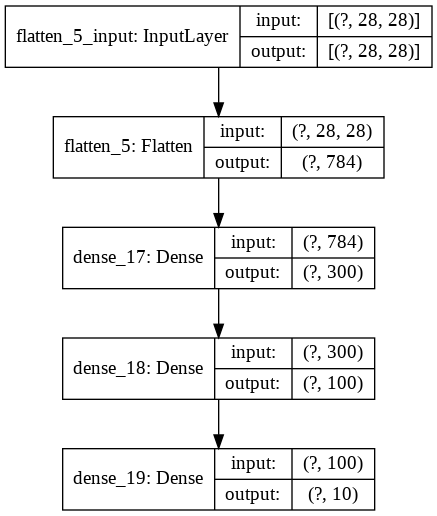

In [40]:
# modell visualisieren
keras.utils.plot_model(fashion_model, "Students Teach Professionals.png", show_shapes=True)

-----------------------------------------------------------------------------------------
**Übung**

1. Fügt nach der Inputschicht eine dichte (dense) Schicht hinzu, die über 200 Neuronen und eine "relu" Aktivierungsfunktion verfügt. 
2. Visualisiert die neue Architektur. 

-----------------------------------------------------------------------------------------


In [41]:
import numpy as np 
np.random.seed(42)
tf.random.set_seed(42)
fashion_model.compile(loss = "sparse_categorical_crossentropy", 
                     optimizer = "sgd", 
                     metrics = ["accuracy"])

In [42]:
history = fashion_model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7041 - accuracy: 0.7699
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4761 - accuracy: 0.8354
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4331 - accuracy: 0.8499
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4066 - accuracy: 0.8576
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3880 - accuracy: 0.8634


In [ ]:
history.history

{'loss': [0.00021688595501861226,
  0.00017730590677044044,
  0.00014936716698575765,
  0.00012866362472220013,
  0.00011274878016362588],
 'accuracy': [0.1, 0.1, 0.1, 0.1, 0.1]}

------------------------------------------------------------------------------------------------
**Übung**

1. Welche Genauigkeit erreicht das Modell, wenn die Anzahl an Epochen auf 30 erhöht wird? und wenn sie auf 1 erniedrigt wird? 

------------------------------------------------------------------------------------------------

* **Modell testen** 

In [ ]:
error_test= fashion_model.evaluate(X_test, y_test, verbose=0)

In [ ]:
error_test

[0.0, 0.1]